# Problem 2: Filtering



In [51]:
import matplotlib.pyplot as plt

import sys

from fft import fft, fft_power, ifft
import numpy as np
import math

In [52]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 150

### Part 1 - Smoothed Power Spectrum

The power spectrum was smoothed using a padding techniques.  The first data value *y[0]* was appended to the end of the $CO_2$ data to make the total length of the array 1024.  

Initial length of data: 713


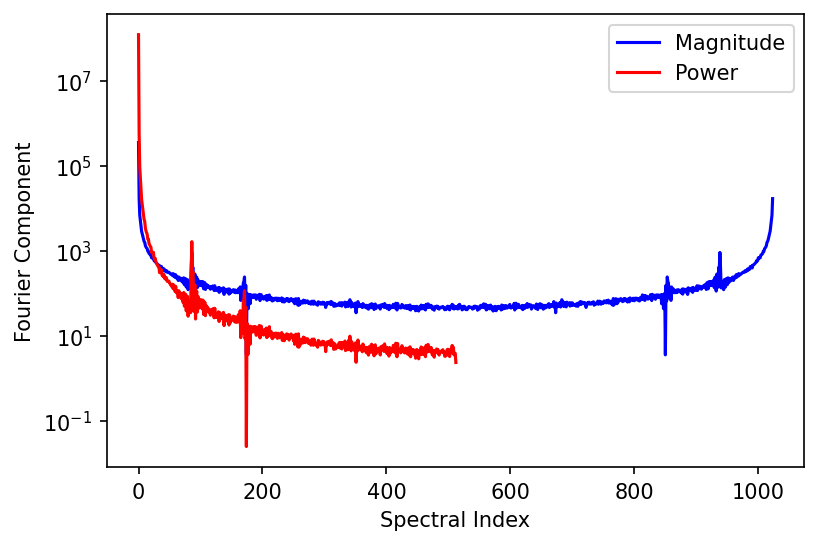

In [53]:
import math
from p1_functions import read_co2_2

# Read CO2 data
x,y = read_co2_2('co2_mm_mlo.txt')
ind = y > 0
x = x[ind] 
y = y[ind]

print("Initial length of data: "+str(len(y)))

# Pad with values
N = 1024
Npad = N - len(y)
padding = np.ones(Npad)*y[0]
y = np.concatenate( (y, padding) )
x = np.arange(len(y))

Y = fft(y)

Y_abs = abs(Y)
powery = fft_power(Y)
powerx = np.arange(powery.size)

f1 = plt.figure(1)
plt.plot( x, Y_abs ,'b-', label='Magnitude')
plt.plot(powerx, powery, 'r-', label='Power')
plt.yscale('log')
plt.ylabel('Fourier Component')
plt.xlabel('Spectral Index')
plt.legend()

plt.show()

### Part 2 - Filtered Data

The padded data was used to clean up the $CO_2$ data.  Frequencies above 200 were then filtered out of the data set.

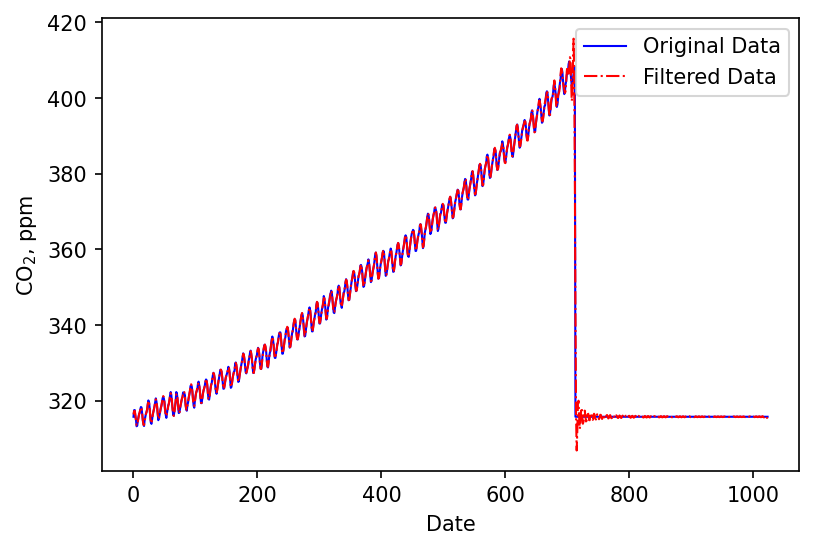

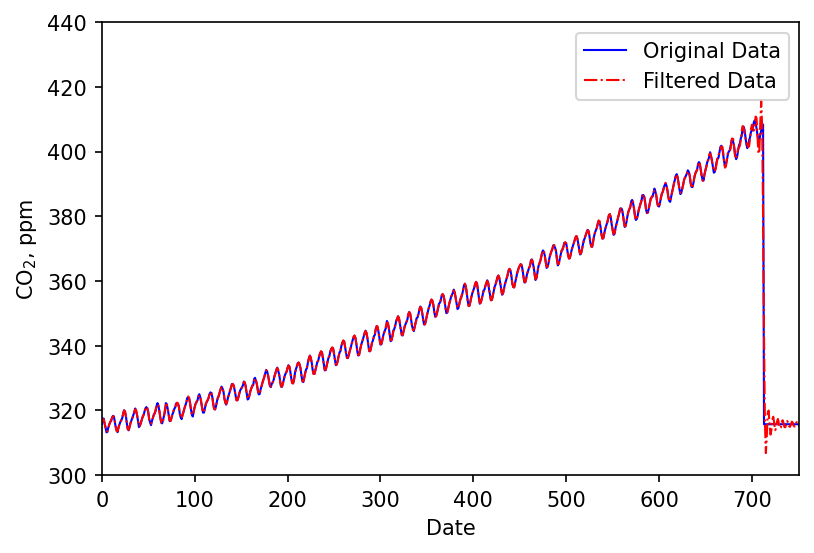

In [54]:
maxfreq = 200
Y_filtered = Y
Y_filtered[maxfreq:len(Y)-maxfreq] = 0.0

yfiltered = ifft(Y_filtered)

f2 = plt.figure(2)
plt.plot( x, y , 'b-', label='Original Data', linewidth=1)
plt.plot( x, np.real(yfiltered), 'r-.',label='Filtered Data', linewidth=1)
plt.ylabel('CO${_2}$, ppm')
plt.xlabel('Date')
plt.legend()

f3 = plt.figure(3)
plt.plot( x, y , 'b-', label='Original Data', linewidth=1)
plt.plot( x, np.real(yfiltered), 'r-.',label='Filtered Data', linewidth=1)
plt.ylabel('CO${_2}$, ppm')
plt.xlabel('Date')
plt.xlim([0,751])
plt.ylim([300,440])
plt.legend()